In [14]:
import sys
import os

import geopandas as gpd
import pandas as pd

from shapely.geometry import Polygon
from osgeo import gdal

In [2]:
def get_extend(file_path):
    src = gdal.Open(file_path)
    ulx, xres, xskew, uly, yskew, yres  = src.GetGeoTransform()
    lrx = ulx + (src.RasterXSize * xres)
    lry = uly + (src.RasterYSize * yres)
    return(ulx,uly,lrx,lry)

In [120]:
path_ortho = '/media/philipp/Seagate Desktop Drive/2018/2018410_vorarlberg_lb_rgbi.img'
ulx,uly,lrx,lry = get_extend(path_ortho)

print('upper left corner: ', ulx, uly)
print('lower right corner: ', lrx, lry)

upper left corner:  110076.57240882212 418412.32049253245
lower right corner:  168338.57240882213 330382.32049253245


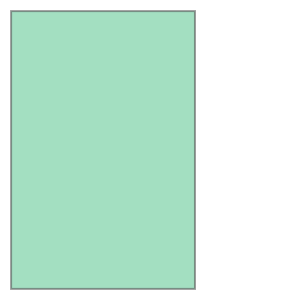

In [121]:
Polygon([(ulx, uly), (lrx, uly), (lrx, lry), (ulx, lry)])

In [122]:
d = {'name': ['Vorarlberg'], 'year': [2018], 'file': ['2018410_vorarlberg_lb_rgbi.img'], 'geometry': [Polygon([(ulx, uly), (lrx, uly), (lrx, lry), (ulx, lry)])]}

In [123]:
gdf = gpd.GeoDataFrame(d, crs="EPSG:31287")

In [124]:
gdf.to_file("/home/philipp/Data/edin_diss/GIS_meta/2018/vorarlberg/vorarlberg.shp")